In [1]:
import json

In [2]:
def get_experiment_dict(experiment):
    report_path = 'classification_report.txt'
    experiment_dict = json.load(open(experiment + report_path))
    del experiment_dict['macro avg']
    del experiment_dict['weighted avg']
    del experiment_dict['accuracy']
    return experiment_dict

baseline = get_experiment_dict('saves/baseline/')
autoencoder = get_experiment_dict('path_autoencoder/saves/path_autoencoded/')
pioneer = get_experiment_dict('pioneer/saves/pioneer_lstm/')

In [3]:
# calculate mean f1-scores for for all classes with at least n samples
def mean_f1(experiment_dict, n=0):
    f1s = []
    for k, v in experiment_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        if v_s >= n:
            f1s.append(v_f1)
    return sum(f1s) / len(f1s)

def mean_f1_support_weighted(experiment_dict):
    f1s = []
    supports = []
    for k, v in experiment_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s.append(v_f1 * v_s)
        supports.append(v_s)
    return sum(f1s) / sum(supports)

def count_classes_with_n_samples(experiment_dict, n=0):
    count = 0
    for k, v in experiment_dict.items():
        v_s = v['support']
        if v_s >= n:
            count += 1
    return count

In [4]:
print('baseline')
for n in (0, 50, 100, 500):
    print(f'mean f1 for classes with at least {n:5} samples: {mean_f1(baseline, n):.3f}  ({count_classes_with_n_samples(baseline, n):3}) classes')

print('pioneer')
for n in (0, 50, 100, 500):
    print(f'mean f1 for classes with at least {n:5} samples: {mean_f1(pioneer, n):.3f}  ({count_classes_with_n_samples(pioneer, n):3}) classes')

baseline
mean f1 for classes with at least     0 samples: 0.669  ( 67) classes
mean f1 for classes with at least    50 samples: 0.823  ( 34) classes
mean f1 for classes with at least   100 samples: 0.815  ( 30) classes
mean f1 for classes with at least   500 samples: 0.814  ( 19) classes
pioneer
mean f1 for classes with at least     0 samples: 0.825  ( 67) classes
mean f1 for classes with at least    50 samples: 0.934  ( 34) classes
mean f1 for classes with at least   100 samples: 0.926  ( 30) classes
mean f1 for classes with at least   500 samples: 0.972  ( 19) classes


In [5]:
# use matplotlib to plot the f1-scores vs the number of samples
import matplotlib.pyplot as plt
import numpy as np

def plot_f1_vs_support(experiment_dict):
    f1s = []
    supports = []
    for k, v in experiment_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s.append(v_f1)
        supports.append(v_s)

    plt.scatter(supports, f1s)
    plt.xscale('log')
    plt.xlabel('number of samples')
    plt.ylabel('f1-score')
    # set x labels to be integers
    plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())
    plt.show()

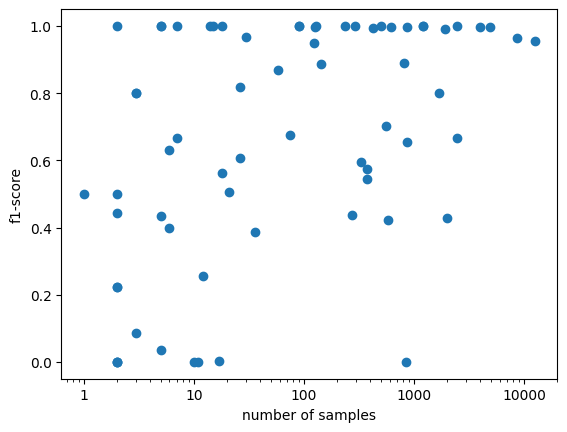

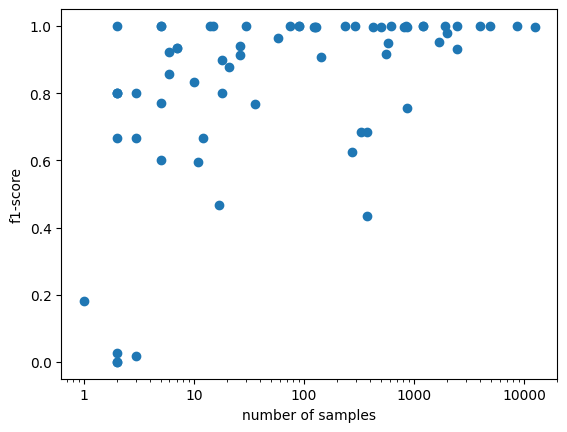

In [6]:
plot_f1_vs_support(baseline)
plot_f1_vs_support(pioneer)

In [7]:
# find classes in pioneer with support > 100 with f1-score < 0.8
def low_supp_high_f1(experiment, samples_threshold=50, f1_threshold=0.8):
    for k, v in experiment.items():
        supp = int(v['support'])
        f1 = v['f1-score']
        if supp <= samples_threshold and f1 >= f1_threshold:
            print(f'{k:20} {f1:.3f} {supp:5}')

def low_supp_low_f1(experiment, samples_threshold=50, f1_threshold=0.8):
    for k, v in experiment.items():
        supp = int(v['support'])
        f1 = v['f1-score']
        if supp <= samples_threshold and f1 <= f1_threshold:
            print(f'{k:20} {f1:.3f} {supp:5}')

def high_supp_high_f1(experiment, samples_threshold=50, f1_threshold=0.8):
    for k, v in experiment.items():
        supp = int(v['support'])
        f1 = v['f1-score']
        if supp >= samples_threshold and f1 >= f1_threshold:
            print(f'{k:20} {f1:.3f} {supp:5}')

def high_supp_low_f1(experiment, samples_threshold=50, f1_threshold=0.8):
    for k, v in experiment.items():
        supp = int(v['support'])
        f1 = v['f1-score']
        if supp >= samples_threshold and f1 <= f1_threshold:
            print(f'{k:20} {f1:.3f} {supp:5}')

In [8]:
print('baseline')
print('low support, high f1 (easy to classify)')
low_supp_high_f1(baseline)
print('\nlow support, low f1')
low_supp_low_f1(baseline)
print('\nhigh support, high f1')
high_supp_high_f1(baseline)
print('\nhigh support, low f1 (hard to classify)')
high_supp_low_f1(baseline)

print('\npioneer')
print('low support, high f1 (easy to classify)')
low_supp_high_f1(pioneer)
print('\nlow support, low f1')
low_supp_low_f1(pioneer)
print('\nhigh support, high f1')
high_supp_high_f1(pioneer)
print('\nhigh support, low f1 (hard to classify)')
high_supp_low_f1(pioneer)

baseline
low support, high f1 (easy to classify)
awk                  1.000     5
cat                  0.820    26
cmp                  1.000     5
cp                   0.968    30
dmesg                1.000    15
kill                 1.000     2
lockf                0.800     3
mailwrapper          0.800     3
mkdir                1.000    18
route                1.000     7
uptime               1.000    14

low support, low f1
adjkerntz            0.000    11
basename             0.000     2
dhclient             0.002    17
egrep                0.500     2
expr                 0.000     2
grep                 0.036     5
hostname             0.000    10
less                 0.087     3
lockf                0.800     3
ls                   0.255    12
mail                 0.222     2
mailwrapper          0.800     3
mktemp               0.632     6
mount                0.444     2
newsyslog            0.561    18
ps                   0.435     5
rm                   0.386    36
sed   

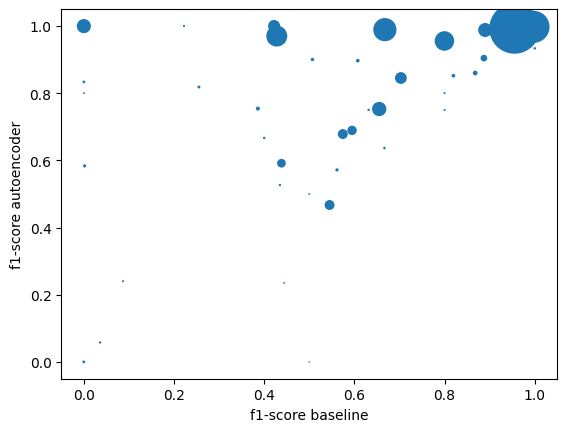

In [9]:
# take two dicts, make a scatter plot visualizing the difference in f1-scores by plotting both scores and different colours
def plot_f1_diff(experiment_dict1, experiment_dict2):
    f1s1 = []
    f1s2 = []
    supports = []
    for k, v in experiment_dict1.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        if k in experiment_dict2:
            f1s1.append(v_f1)
            f1s2.append(experiment_dict2[k]['f1-score'])
            supports.append(v_s)

    plt.scatter(f1s1, f1s2, s=np.array(supports) / 10)
    plt.xlabel('f1-score baseline')
    plt.ylabel('f1-score autoencoder')
    plt.show()

plot_f1_diff(baseline, autoencoder)

In [10]:
def plot_f1_vs_support_diff(experiment_1_dict, experiment_2_dict):
    f1s_1 = []
    supports_1 = []
    for k, v in experiment_1_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s_1.append(v_f1)
        supports_1.append(v_s)
    f1s_2 = []
    supports_2 = []
    for k, v in experiment_2_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s_2.append(v_f1)
        supports_2.append(v_s)

    plt.scatter(supports_1, f1s_1, c='blue')
    plt.scatter(supports_2, f1s_2, c='red')
    for i in range(len(supports_1)):
        if f1s_1[i] < f1s_2[i]:
            plt.plot([supports_1[i], supports_2[i]], [f1s_1[i], f1s_2[i]], c='green')
        else:
            plt.plot([supports_1[i], supports_2[i]], [f1s_1[i], f1s_2[i]], c='red')
    plt.xscale('log')
    plt.xlabel('number of samples')
    plt.ylabel('f1-score')
    plt.show()

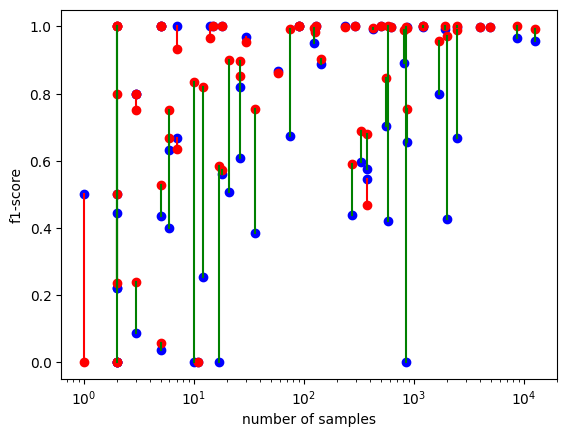

In [11]:
plot_f1_vs_support_diff(baseline, autoencoder)

In [12]:
"""
\begin{table}
    \begin{tabular}{l|ccc||l|ccc}
    Executable & Precision & Recall & F1-Score & Executable & Precision & Recall & F1-Score\\\hline

    \end{tabular}
    \caption{Feature - Netzwerkinformationen: Klassifikationsbericht}
\end{table}
"""
import math
def print_latex_classification_report(experiment):
    print(r'\begin{table}')
    print(r'\begin{tabular}{l|ccc||l|ccc}')
    print(r'Executable & Precision & Recall & F1-Score & Executable & Precision & Recall & F1-Score\\\hline')
    half = math.ceil(len(experiment) / 2)
    for i in range(0, half):
        left_index = i
        right_index = i + half
        left_key = list(experiment.keys())[left_index]
        right_key = list(experiment.keys())[right_index] if right_index < len(experiment) else ''

        left = experiment[left_key]
        right = experiment[right_key] if right_key else {'precision': '', 'recall': '', 'f1-score': ''}
        left_precision = f'{left['precision']:.3f}'
        left_recall = f'{left['recall']:.3f}'
        left_f1 = f'{left['f1-score']:.3f}'

        if right_key:
            right_precision = f'{right['precision']:.3f}'
            right_recall = f'{right['recall']:.3f}'
            right_f1 = f'{right['f1-score']:.3f}'
        else:
            right_precision = f''
            right_recall = f''
            right_f1 = f''

        print(f'{left_key} & {left_precision} & {left_recall} & {left_f1} & {right_key} & {right_precision} & {right_recall} & {right_f1} \\\\')

    print(r'\end{tabular}')
    print(r'\caption{TODO: Klassifikationsbericht}')
    print(r'\end{table}')

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_109085/3649240397.py:1: SyntaxWarning: invalid escape sequence '\h'
  """


In [13]:
print_latex_classification_report(baseline)

\begin{table}
\begin{tabular}{l|ccc||l|ccc}
Executable & Precision & Recall & F1-Score & Executable & Precision & Recall & F1-Score\\\hline
adjkerntz & nan & 0.000 & 0.000 & mkdir & 1.000 & 1.000 & 1.000 \\
alpine & 0.594 & 0.861 & 0.703 & mktemp & 0.462 & 1.000 & 0.632 \\
anvil & 0.530 & 0.561 & 0.545 & mlock & 1.000 & 1.000 & 1.000 \\
atrun & 1.000 & 1.000 & 1.000 & mount & 0.286 & 1.000 & 0.444 \\
awk & 1.000 & 1.000 & 1.000 & mv & 1.000 & 0.997 & 0.998 \\
basename & nan & 0.000 & 0.000 & netstat & 0.958 & 0.793 & 0.868 \\
bash & 0.951 & 0.959 & 0.955 & newsyslog & 0.410 & 0.889 & 0.561 \\
cat & 0.714 & 0.962 & 0.820 & pickup & 0.959 & 0.825 & 0.887 \\
cleanup & 0.285 & 0.946 & 0.438 & pkg & 0.957 & 0.687 & 0.800 \\
cmp & 1.000 & 1.000 & 1.000 & proxymap & 0.751 & 0.492 & 0.595 \\
cp & 0.938 & 1.000 & 0.968 & ps & 0.278 & 1.000 & 0.435 \\
cron & 0.994 & 1.000 & 0.997 & python2.7 & 0.000 & 0.000 & 0.000 \\
date & 0.998 & 1.000 & 0.999 & resizewin & 1.000 & 1.000 & 1.000 \\
dd & 1.000